## 난임 환자 대상 임신 성공 여부 예측

### LGAimers 6th 온라인 해커톤

Import

In [9]:
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Load

In [10]:
# 데이터 로드
Total_train = pd.read_csv('../data/Total_train_dataset_42.csv')
Total_test = pd.read_csv('../data/Total_test_dataset_42.csv')

In [11]:
# ID 열을 제외한 특성과 타겟 변수 분리
Total_X = Total_train.drop(['임신_성공_여부', 'ID'], axis=1)
Total_y = Total_train['임신_성공_여부']

### 인코딩 

In [12]:
Total_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256344 entries, 0 to 256343
Data columns (total 97 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   시술_당시_나이                  256344 non-null  object 
 1   임신_시도_또는_마지막_임신_경과_연수     256344 non-null  float64
 2   배란_자극_여부                  256344 non-null  int64  
 3   단일_배아_이식_여부               256344 non-null  float64
 4   착상_전_유전_검사_사용_여부          256344 non-null  float64
 5   착상_전_유전_진단_사용_여부          256344 non-null  float64
 6   남성_주_불임_원인                256344 non-null  int64  
 7   남성_부_불임_원인                256344 non-null  int64  
 8   여성_주_불임_원인                256344 non-null  int64  
 9   여성_부_불임_원인                256344 non-null  int64  
 10  부부_주_불임_원인                256344 non-null  int64  
 11  부부_부_불임_원인                256344 non-null  int64  
 12  불명확_불임_원인                 256344 non-null  int64  
 13  불임_원인_-_난관_질환             256344 non-null  i

In [13]:
Total_categorical_columns = [
    "시술_당시_나이",
    "난자_출처",
    "정자_출처",
    "난자_기증자_나이",
    "정자_기증자_나이"
]

In [14]:
# 모든 범주형 변수를 문자열로 변환
Total_X[Total_categorical_columns] = Total_X[Total_categorical_columns].astype(str)
Total_test[Total_categorical_columns] = Total_test[Total_categorical_columns].astype(str)

# OrdinalEncoder를 사용하여 범주형 변수 인코딩
Total_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Total_X[Total_categorical_columns] = Total_encoder.fit_transform(Total_X[Total_categorical_columns])
Total_test[Total_categorical_columns] = Total_encoder.transform(Total_test[Total_categorical_columns])

## Modeling

In [ ]:
# from sklearn.utils import resample
# from sklearn.model_selection import train_test_split
# import numpy as np

# # 다운샘플링을 위한 데이터 준비
# # 예시로 클래스 0과 클래스 1이 있다고 가정
# class_0 = Total_X[Total_y == 0]
# class_1 = Total_X[Total_y == 1]

# # 클래스 0을 클래스 1의 수에 맞춰 다운샘플링
# class_0_downsampled = resample(class_0, 
#                                replace=False,    # 복원 추출하지 않음
#                                n_samples=len(class_1),  # 클래스 1의 수에 맞춤
#                                random_state=42)  # 재현성을 위한 랜덤 시드

# # 다운샘플링된 데이터와 클래스 1 데이터를 합침
# X_downsampled = np.vstack((class_0_downsampled, class_1))
# y_downsampled = np.hstack((np.zeros(len(class_0_downsampled)), np.ones(len(class_1))))

In [ ]:
# 데이터 분할
Total_X_train, Total_X_test, Total_y_train, Total_y_test = train_test_split(Total_X, 
                                                                            Total_y, 
                                                                            test_size=0.2, 
                                                                            random_state=42,
                                                                            stratify=Total_y)

### Total 데이터


--- Model Performance ---
Model Accuracy: 0.7460063586182684
Model F1 Score: 0.20422879491566853
Model AUC: 0.7386854833633694


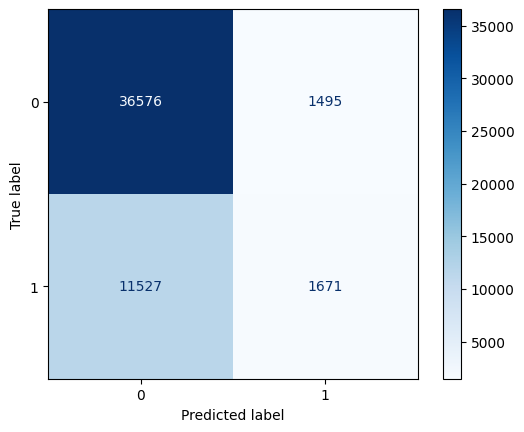

In [17]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 모델 초기화
Total_model = lgb.LGBMClassifier(
    n_estimators=1358,  # 트리의 개수 (부스팅 반복 횟수)
    num_leaves=2375,  # 하나의 트리가 가질 수 있는 최대 리프 노드 수
    max_depth=5,  # 트리의 최대 깊이
    learning_rate=0.020900420588480864,  # 학습률 (0과 1 사이의 값)
    min_child_samples=314,  # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    subsample=0.9419810939316283,  # 각 트리를 학습할 때 사용하는 데이터 샘플링 비율
    colsample_bytree=0.814176180462465,  # 각 트리를 학습할 때 사용하는 피처 샘플링 비율
    reg_alpha=9.356441136629499,  # L1 정규화 (Lasso) 계수
    reg_lambda=8.217525317686007,  # L2 정규화 (Ridge) 계수

    metric='auc',  # 모델 성능 평가 지표
    objective='binary',  # 손실 함수 (이진 분류인 경우 'binary' 또는 'cross_entropy' 사용)
    random_state=42,  # 랜덤 시드 값 (재현성을 위해 설정)
    boosting_type='gbdt',  # 부스팅 유형 ('gbdt', 'dart', 'goss', 'rf' 중 하나)
    verbose=-1  # 학습 과정의 출력을 제어 (음수이면 출력을 억제)
)

# 모델 학습
Total_model.fit(Total_X_train, Total_y_train)

# 예측
y_pred = Total_model.predict(Total_X_test)
y_pred_proba = Total_model.predict_proba(Total_X_test)[:, 1]

# 평가
accuracy = accuracy_score(Total_y_test, y_pred)
f1 = f1_score(Total_y_test, y_pred)
auc = roc_auc_score(Total_y_test, y_pred_proba)
cm = confusion_matrix(Total_y_test, y_pred)

# 결과 출력
print()
print("--- Model Performance ---")
print(f"Model Accuracy: {accuracy}")
print(f"Model F1 Score: {f1}")
print(f"Model AUC: {auc}")

# 혼동 행렬 출력
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Total_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

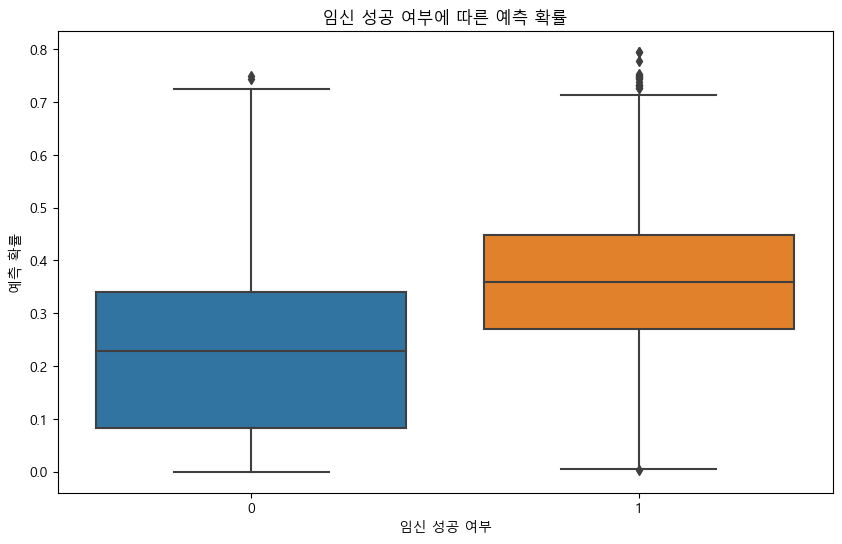

In [20]:
import platform
from matplotlib import rc

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':  # Windows 환경
    rc('font', family='Malgun Gothic')  # 맑은 고딕

# 음수 표시 가능하도록 설정
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

# y_pred_proba를 임신_성공_여부에 따라 박스플롯으로 출력
result_df = pd.DataFrame({'임신_성공_여부': Total_y_test, '예측_확률': y_pred_proba})

# 박스플롯 출력
plt.figure(figsize=(10, 6))
sns.boxplot(x='임신_성공_여부', y='예측_확률', data=result_df)
plt.title('임신 성공 여부에 따른 예측 확률')
plt.xlabel('임신 성공 여부')
plt.ylabel('예측 확률')
plt.show()

데이콘 PUBLIC xx

## 제출

In [9]:
# 모델 학습 및 예측
Total_model.fit(Total_X, Total_y)
Total_pred_proba = Total_model.predict_proba(Total_test.drop('ID', axis=1))[:, 1]
Total_test['probability'] = Total_pred_proba

# 최종 제출 파일 생성
submission = Total_test[['ID', 'probability']]
submission = submission.sort_values(by='ID')

In [11]:
# 제출 파일 저장
submission.to_csv('../submission/code32_all_lgbm.csv', index=False, encoding='utf-8')

----

.